In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.style.use('seaborn')

In [2]:
data = pd.read_excel("Fyttlyf_Data_For_Questions.xlsx")

In [3]:
data['Date_TS'] = pd.to_datetime(data['Date_TS'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76936 entries, 0 to 76935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   visitor_id        76936 non-null  object        
 1   Session_IDs       76936 non-null  object        
 2   Versions          76936 non-null  object        
 3   Date              76936 non-null  datetime64[ns]
 4   Date_TS           76936 non-null  datetime64[ns]
 5   Event_Key         76936 non-null  float64       
 6   Page_Name         76936 non-null  object        
 7   Button_Names      76936 non-null  object        
 8   reward            76936 non-null  float64       
 9   Device            76936 non-null  object        
 10  Operating system  76936 non-null  object        
 11  browser           76936 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 7.0+ MB


In [5]:
data.head()

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:07:54.577,33.0,product:business:::,HeaderMainMenu-Link-Business,0.0,Desktop,WINDOWS,INTERNET EXPLORER
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:07:52.755,11.0,product:business:::,HeaderMainMenu-Link-Business,0.0,Desktop,WINDOWS,INTERNET EXPLORER
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 10:21:28.027,33.0,product:business:::,HeaderMainMenu0-Cta-Log In,0.0,Desktop,WINDOWS,INTERNET EXPLORER
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:08:33.552,33.0,product:business:::,HeaderMainMenu-Link-Help,0.0,Desktop,WINDOWS,INTERNET EXPLORER
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:08:12.789,33.0,product:business:::,SMB grid greyCard-Tertiary-More about business...,0.0,Desktop,WINDOWS,INTERNET EXPLORER


#  Q1 


In [6]:
 min_max =  data['Date_TS'].agg(['min','max'])

In [7]:
# task 1a
days =  min_max['max'] - min_max['min']
min_max['max']

Timestamp('2019-05-04 06:31:57.735000')

In [8]:
# task 1 b
n = days.days
n


7

In [9]:
len(data['Date_TS'])

76936

In [10]:
data['Date_TS'].isna().sum()

0

In [11]:
## solving task 1 c 
import datetime
t_list = []
for i in range (0,n*2+2):
    
    t_dict = {i+1 : [min_max["min"] + datetime.timedelta(hours = i*12), min_max["min"] + datetime.timedelta(hours = (i+1)*12)]}
    t_list.append(t_dict)


In [12]:
t_list

[{1: [Timestamp('2019-04-26 09:49:13.443000'),
   Timestamp('2019-04-26 21:49:13.443000')]},
 {2: [Timestamp('2019-04-26 21:49:13.443000'),
   Timestamp('2019-04-27 09:49:13.443000')]},
 {3: [Timestamp('2019-04-27 09:49:13.443000'),
   Timestamp('2019-04-27 21:49:13.443000')]},
 {4: [Timestamp('2019-04-27 21:49:13.443000'),
   Timestamp('2019-04-28 09:49:13.443000')]},
 {5: [Timestamp('2019-04-28 09:49:13.443000'),
   Timestamp('2019-04-28 21:49:13.443000')]},
 {6: [Timestamp('2019-04-28 21:49:13.443000'),
   Timestamp('2019-04-29 09:49:13.443000')]},
 {7: [Timestamp('2019-04-29 09:49:13.443000'),
   Timestamp('2019-04-29 21:49:13.443000')]},
 {8: [Timestamp('2019-04-29 21:49:13.443000'),
   Timestamp('2019-04-30 09:49:13.443000')]},
 {9: [Timestamp('2019-04-30 09:49:13.443000'),
   Timestamp('2019-04-30 21:49:13.443000')]},
 {10: [Timestamp('2019-04-30 21:49:13.443000'),
   Timestamp('2019-05-01 09:49:13.443000')]},
 {11: [Timestamp('2019-05-01 09:49:13.443000'),
   Timestamp('2019-05

In [13]:
data['Date_TS'][76935]

Timestamp('2019-05-04 06:31:57.735000')

In [14]:
# task 1 d
batch = []

for l in range (0,len(data['Date_TS'])):
    time = data['Date_TS'][l]
    j = 1
    for i in t_list:
        ti = i[j]
        if (time >= ti[0]) &  (time <= ti[1]):
            batch.append(j)
        j+=1


In [15]:
# tie = data['Date_TS'][5558]
# j = 1
# for i in t_list:
#     ti = i[j]
#     if (tie > ti[0]) &  (tie < ti[1]):
#         print(j)   
#     j+=1
# i was cross checking is this method works
# batch[76935]
# len(batch)

In [16]:
data['Batch'] = batch

# Q1 solved

In [17]:
data.head()

,visitor_id,Session_IDs,Versions,Date,Date_TS,Event_Key,Page_Name,Button_Names,reward,Device,Operating system,browser,Batch
0,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:07:54.577,33.0,product:business:::,HeaderMainMenu-Link-Business,0.0,Desktop,WINDOWS,INTERNET EXPLORER,1
1,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:07:52.755,11.0,product:business:::,HeaderMainMenu-Link-Business,0.0,Desktop,WINDOWS,INTERNET EXPLORER,1
2,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 10:21:28.027,33.0,product:business:::,HeaderMainMenu0-Cta-Log In,0.0,Desktop,WINDOWS,INTERNET EXPLORER,1
3,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:08:33.552,33.0,product:business:::,HeaderMainMenu-Link-Help,0.0,Desktop,WINDOWS,INTERNET EXPLORER,1
4,4720794fd17200#2d16c0cfce0fff7206372,65614647217200#772726df65fe72ff0f72674,T2,2019-04-26,2019-04-26 11:08:12.789,33.0,product:business:::,SMB grid greyCard-Tertiary-More about business...,0.0,Desktop,WINDOWS,INTERNET EXPLORER,1


In [32]:
data['Session_IDs'].str.split("#")

0         [65614647217200, 772726df65fe72ff0f72674]
1         [65614647217200, 772726df65fe72ff0f72674]
2         [65614647217200, 772726df65fe72ff0f72674]
3         [65614647217200, 772726df65fe72ff0f72674]
4         [65614647217200, 772726df65fe72ff0f72674]
                            ...                    
76931       [72dbf51ed17200, d049b3d7e4bfd95727260]
76932      [72dbfeef017200, d006272601cffd723e7267]
76933    [72dc29b77217200, d0075cde7292fd727271, 2]
76934      [72dc2b03517200, d0472b129343fd72472fe2]
76935       [72dc493cc17200, d00596fb0d1fd723c, 39]
Name: Session_IDs, Length: 76936, dtype: object

In [18]:
data['Batch']

0         1
1         1
2         1
3         1
4         1
         ..
76931    16
76932    16
76933    16
76934    16
76935    16
Name: Batch, Length: 76936, dtype: int64

#   Q2 REWARD RATE

Text(0.5, 1.0, 'VERSION VS COUNT')

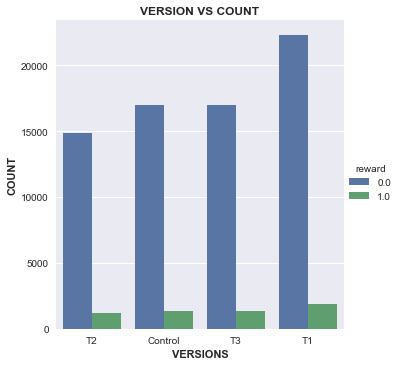

In [20]:
sns.catplot(x = 'Versions' , data = data, hue = 'reward', kind = 'count')
plt.xlabel('VERSIONS', fontweight = 'bold')
plt.ylabel('COUNT', fontweight = 'bold')
plt.title('VERSION VS COUNT', fontweight = 'bold')

# Q2 SOLUTION
#Mean of the grouped data will be the sum of both 1s and 0s divided by total count the result is same as counting the number of 1s and dividing by total count


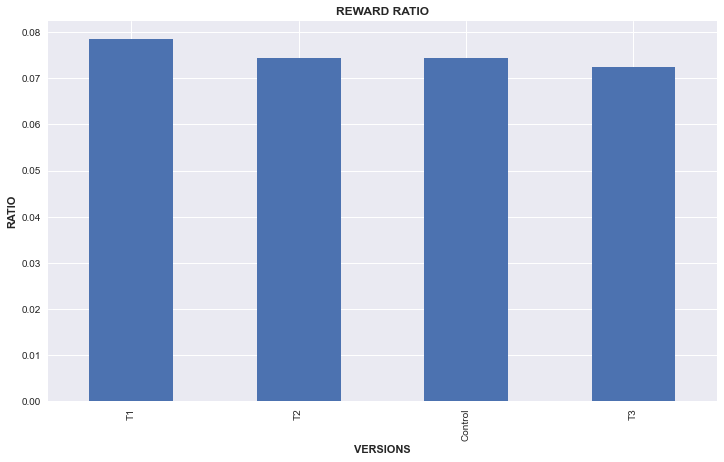

In [21]:
plt.figure(figsize=(12,7))
data.groupby('Versions')['reward'].mean()
data.groupby('Versions')['reward'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('VERSIONS', fontweight = 'bold')
plt.ylabel('RATIO', fontweight = 'bold')
plt.title('REWARD RATIO', fontweight = 'bold')
plt.show()

#  Q3 

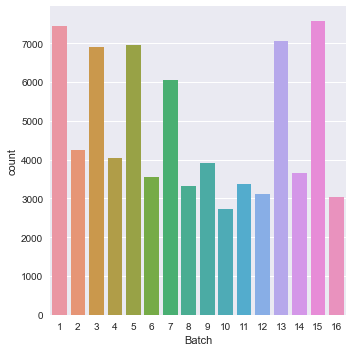

In [22]:
sns.catplot(x = 'Batch', kind = 'count', data = data)

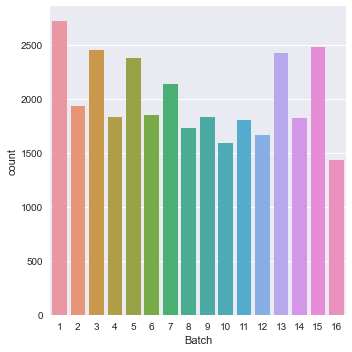

In [23]:
df = data.drop_duplicates(subset = 'visitor_id')
sns.catplot(x = 'Batch', kind = 'count', data = df)

# Q3 SOLUTION


In [27]:
data['Versions'].unique()

array(['T2', 'Control', 'T3', 'T1'], dtype=object)

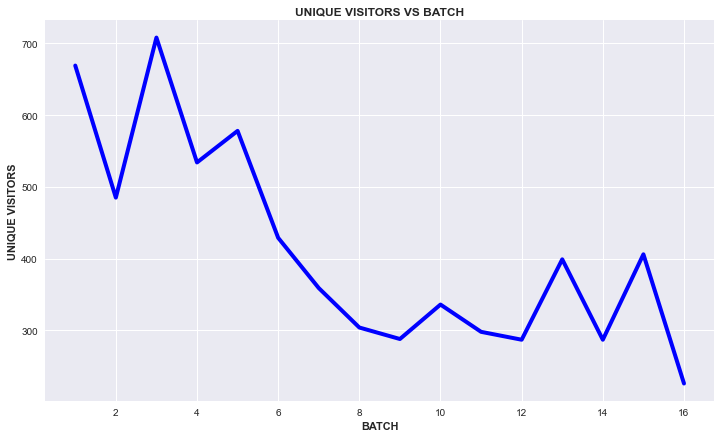

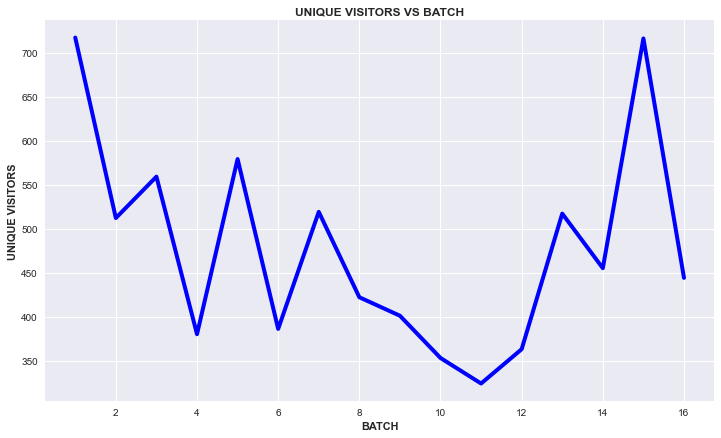

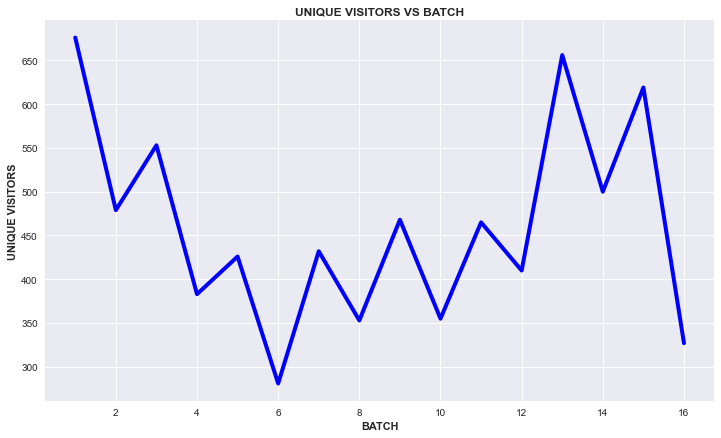

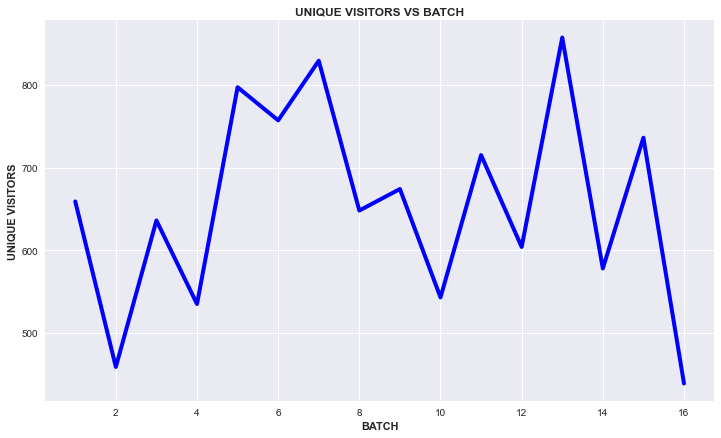

In [30]:
for i in ['T2', 'Control', 'T3', 'T1'] :
    plt.figure(figsize=(12,7))
    df[df['Versions'] == i].groupby('Batch')['visitor_id'].count().plot(kind = 'line', linewidth = 4, color = 'blue') 
    plt.xlabel('BATCH',fontweight = 'bold')
    plt.ylabel("UNIQUE VISITORS",fontweight = 'bold')
    plt.title('UNIQUE VISITORS VS BATCH', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'UNIQUE VISITORS VS BATCH')

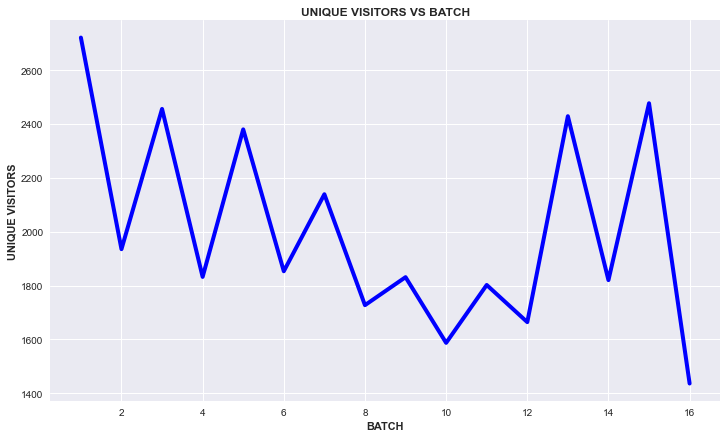

In [159]:
plt.figure(figsize=(12,7))
df.groupby('Batch')['visitor_id'].count().plot(kind = 'line', linewidth = 4, color = 'blue')
plt.xlabel('BATCH',fontweight = 'bold')
plt.ylabel("UNIQUE VISITORS",fontweight = 'bold')
plt.title('UNIQUE VISITORS VS BATCH', fontweight = 'bold')

# Q4  What are the top 5 Button_Names which were clicked?
Find the button_name which has the greatest number of Session _id with clicks. To find definition of Clicks refer to the data_dict sheet.
I have not recieved any data_dict sheet
hence i am solving this question with certain assumptions

In [160]:
data['Event_Key'].value_counts()

11.0    46921
33.0    30015
Name: Event_Key, dtype: int64

Assuming event key 11 as a click


In [161]:
data[data['Event_Key'] == 11].groupby('Button_Names')['Session_IDs'].count()


Button_Names
1.0                           1
3.0                           2
5.0                           1
#                         28357
#Pro_VT_fixed-fees            1
                          ...  
vx_text-body-md_medium        1
wallet                        1
yesbtn                        2
zettle-subnav-link            1
Şifreyi göster                1
Name: Session_IDs, Length: 498, dtype: int64

lot of # , i guess the values of # must  correspond to the data in the rows above it, hence filling these # 

In [162]:
import numpy as np
data['Button_Names'] = data['Button_Names'].replace('#', np.NaN)
data['Button_Names'] = data['Button_Names'].fillna(method='ffill')


In [163]:
data[data['Event_Key'] == 11].groupby('Button_Names')['Session_IDs'].count().sort_values(ascending = False)


Button_Names
sales-invitation-docked-start-chat                 7444
HeaderMainMenu0-Cta-Log In                         6023
CTA                                                5985
Hero-Primary-Sign Up                               4299
https://www.fyttlyf.com/us/webapps/mpp/merchant    3407
                                                   ... 
closing-help                                          1
closeCart                                             1
close-btn                                             1
close                                                 1
Şifreyi göster                                        1
Name: Session_IDs, Length: 569, dtype: int64

# Q4 SOLUTION 

visualization

Text(0.5, 0, 'BUTTON NAMES')

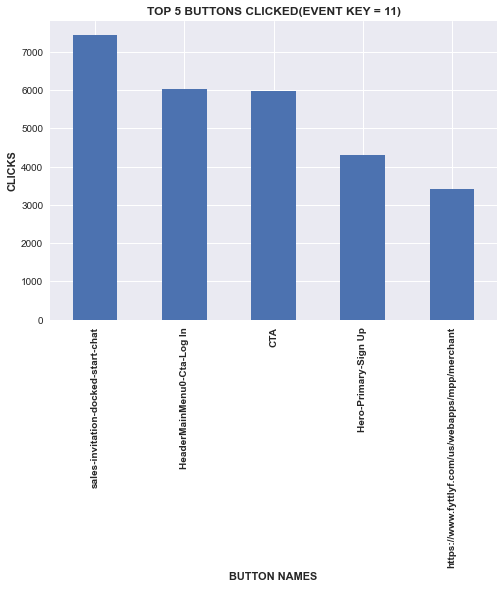

In [176]:
data[data['Event_Key'] == 11].groupby('Button_Names')['Session_IDs'].count().sort_values(ascending = False)[0:5].plot(kind = 'bar')
plt.xticks(rotation = 90,fontweight = 'bold')
plt.title("TOP 5 BUTTONS CLICKED(EVENT KEY = 11)",fontweight = 'bold')
plt.ylabel('CLICKS', fontweight = 'bold')
plt.xlabel('BUTTON NAMES', fontweight = 'bold')
#Q4 SOLUTION

# Q4 SOLUTION

Text(0.5, 0, 'BUTTON NAMES')

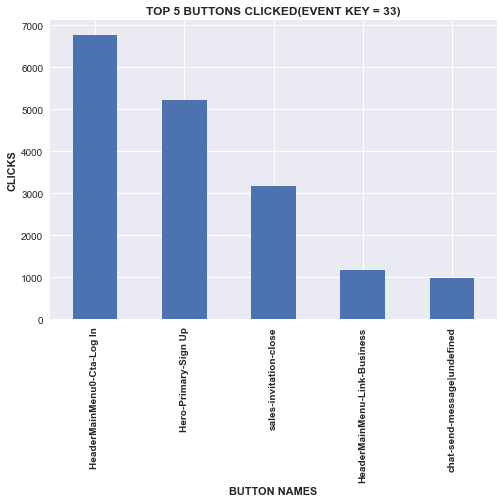

In [174]:
data[data['Event_Key'] == 33].groupby('Button_Names')['Session_IDs'].count().sort_values(ascending = False)[0:5].plot(kind = 'bar')
plt.xticks(rotation = 90, fontweight = 'bold')
plt.title("TOP 5 BUTTONS CLICKED(EVENT KEY = 33)", fontweight = 'bold')
plt.ylabel('CLICKS', fontweight = 'bold')
plt.xlabel('BUTTON NAMES', fontweight = 'bold')
# Q4 SOLUTION

#  Q5 as we can see from before t1 has the highest reward rate

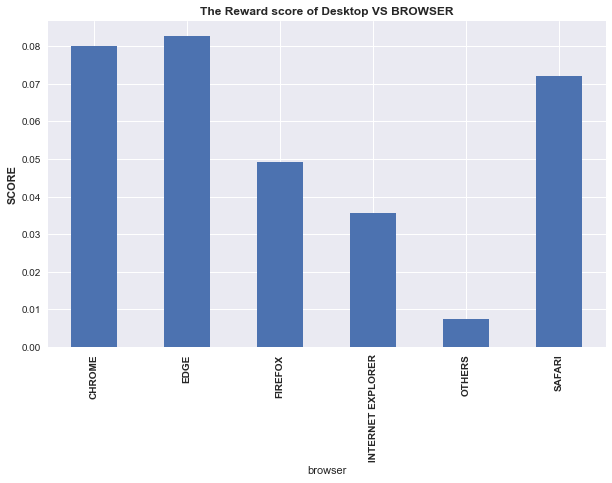

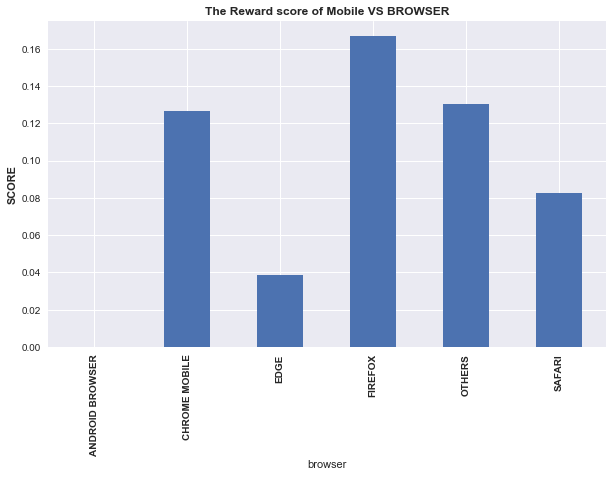

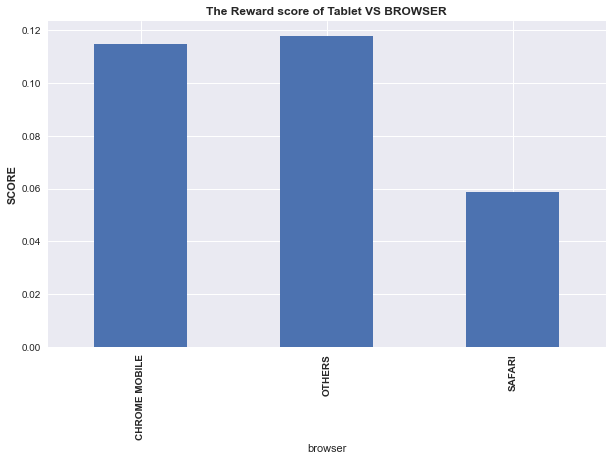

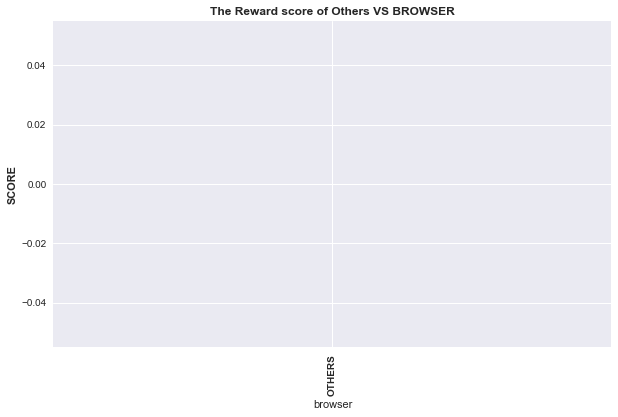

In [178]:
for i in ['Desktop', 'Mobile', 'Tablet', 'Others']:
    plt.figure(figsize=(10,6))
    data[(data['Versions'] == 'T1')&(data['Device'] == i)].groupby('browser')['reward'].mean().plot(kind = 'bar')
    plt.title(f'The Reward score of {i} VS BROWSER', fontweight = 'bold')
    plt.ylabel('SCORE', fontweight = 'bold')
    plt.xticks(rotation = 90, fontweight = 'bold')
    plt.show()

Text(0.5, 1.0, 'REWARD SCORE ACROSS DEVICES AND BROWSER')

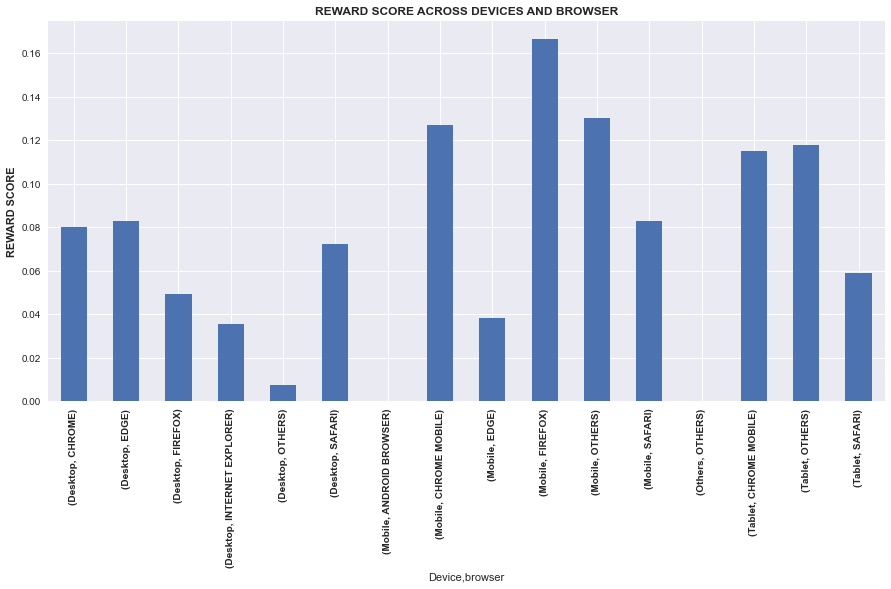

In [177]:
plt.figure(figsize=(15,7))
data[data['Versions'] == 'T1'].groupby(['Device','browser'])['reward'].mean().plot(kind = 'bar')
plt.xticks(rotation = 90, fontweight = 'bold')
plt.ylabel('REWARD SCORE', fontweight = 'bold')
plt.title('REWARD SCORE ACROSS DEVICES AND BROWSER', fontweight = 'bold')

In [168]:
# END OF ASSIGNMENT